# Vansihing Point of image

In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn import cluster

In [10]:
def intersection(r1, theta1, r2, theta2):
    x = (r1-r2*(np.sin(theta1)/np.sin(theta2)))/(np.cos(theta1)-np.cos(theta2)*(np.sin(theta1)/np.sin(theta2)))
    y = (r2-x*np.cos(theta2))/np.sin(theta2)
    return (x,y)

def all_intersections(lines):
    intersects = []
    for i in range(0,len(lines)):
        [rhoi,thetai] = lines[i][0]
        for j in range(0,len(lines)):
            [rhoj,thetaj] = lines[j][0]
            if i is not j:
                (x,y) = intersection(rhoi, thetai, rhoj, thetaj)
                if x<10e3 and y<10e3 and x>-10e3 and y>-10e3: # fix these boundry conditions to be the boundry of the image
                    intersects.append([int(x),int(y)])

    return intersects

def cluster_intersects(points):
    db = cluster.DBSCAN(eps=30, min_samples=1).fit(np.array(points))
    labels = db.labels_
      #n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    biggest_cluster = np.argmax(np.bincount(labels))
    VP = tuple(np.mean(np.array(points)[labels==biggest_cluster],  axis=0).astype('int'))
    
    return VP



#All together : Vanishing point
#SOME PARAMETERS (which are fixed for now):
# - blur or not
# - number of lines to consider
def vanishing_point(im1, blur, n_lines):
    
    #blur
    if blur:
        im1 = cv2.GaussianBlur(im1,(7,7),0)
    
    #get edges
    edges = cv2.Canny(im1, 50, 200, 3)
    
    #get lines
    lines = cv2.HoughLines(edges, 1, np.pi/180, 50, 50, 10 )
    lines = lines[0:n_lines]
    
    #get intersections
    points = all_intersections(lines)
    
    #cluster intersections
    VP = cluster_intersects(points)
    
    return VP

## load and display image

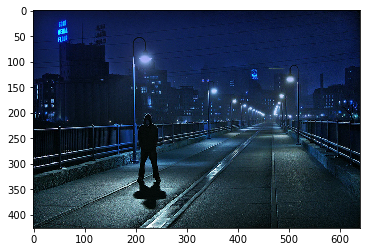

In [12]:
im1 = cv2.imread("image2.jpg")
plt.imshow(im1)

## blur image
sometimes makes it worse

In [13]:
im1 = cv2.GaussianBlur(im1,(7,7),0)

## detect edges

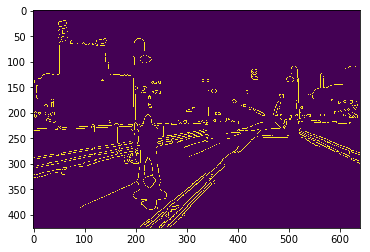

In [14]:
#detect edges
edgy = cv2.Canny(im1, 50, 200, 3)
#display edges
plt.imshow(edgy)

## detect lines in edges

and display those lines on original image

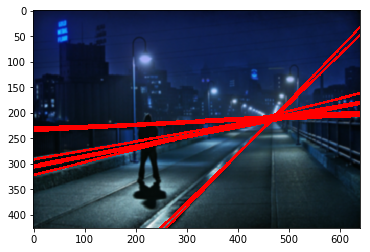

In [15]:
#DETECT LINES
lines = cv2.HoughLines(edgy, 1, np.pi/180, 50, 50, 10 );  
lines = lines[1:10]

#DISPLAY LINES
line_image = np.copy(im1)
for hunch in lines:
    
    [rho,theta] = hunch[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),3)

plt.imshow(line_image)

## Find Intersections of lines

/Users/user1/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  from ipykernel import kernelapp as app


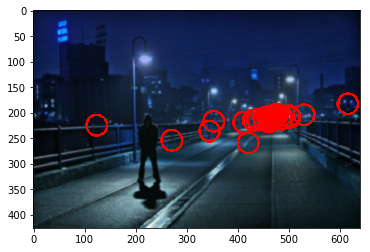

In [17]:
#get intersections
points = all_intersections(lines)

#display intersections
intersect_image = np.copy(im1)
for center in points:
    cv2.circle(intersect_image, tuple(center), 20, (255,0,0), 3)
plt.imshow(intersect_image)

## cluster points and choose the centroid of the the most populous cluster as Vanishing point

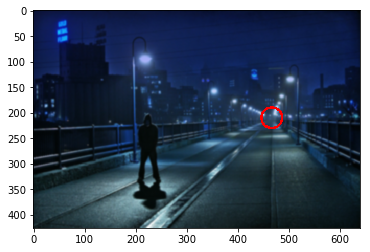

In [18]:
#cluster points and return centroid of largest cluster
VP = cluster_intersects(points)

#display VP (centroid of largest cluster)
VP_image = np.copy(im1)
cv2.circle(VP_image, VP, 20, (255,0,0), 3)
plt.imshow(VP_image)

## run for a bunch of images

/Users/user1/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  from ipykernel import kernelapp as app
/Users/user1/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  from ipykernel import kernelapp as app
/Users/user1/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in float_scalars
  from ipykernel import kernelapp as app


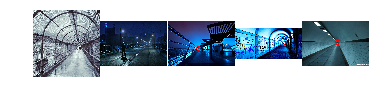

In [9]:
n_lines = 10
blur    = True
for i in range(0,5):
    im1 = cv2.imread("image"+str(i+1)+".jpg")
    VP = vanishing_point(im1, blur, n_lines)
    cv2.circle(im1, VP, 20, (255,0,0), 3)
    plt.subplot(151+i)
    plt.subplots_adjust(wspace=0.01,hspace=0.01)
    plt.axis('off')
    plt.imshow(im1)

plt.savefig('foo.png', dpi = 1000)